In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import itertools

In [92]:
# Just a showcase example
model = pd.read_csv('./benchmark/fashion-mnist_lenet5_squashing_1593471559.csv')
model

,Unnamed: 0,Avg time per step,Beta,Epoch,Test accuracy,Test loss,Test top-3 accuracy,Time per epoch,Train accuracy,Train loss,Train top-3 accuracy
0,0,0.009227,0.107798,1.0,0.099940,2.302929,0.300020,17.299879,0.097983,2.303799,0.297633
1,1,0.008492,0.103681,2.0,0.100040,2.302810,0.299820,15.923419,0.101083,2.303145,0.300250
2,2,0.008382,0.100137,3.0,0.099940,2.303034,0.299820,15.715862,0.099783,2.303259,0.299383
3,3,0.008346,0.098203,4.0,0.100040,2.303035,0.300120,15.648824,0.101767,2.303248,0.302017
4,4,0.008945,0.096926,5.0,0.100040,2.303008,0.300020,16.772182,0.095783,2.303310,0.295117
5,5,0.008467,0.093228,6.0,0.099940,2.302910,0.300120,15.876363,0.097283,2.303294,0.295517
6,6,0.008472,0.096419,7.0,0.099840,2.302935,0.299720,15.884611,0.100667,2.303180,0.301850
7,7,0.009135,0.358144,8.0,0.380791,1.906011,0.873602,17.127363,0.165333,2.257544,0.436333
8,8,0.008456,0.536715,9.0,0.557907,1.183294,0.924820,15.855132,0.509267,1.426161,0.907350
9,9,0.008672,0.639833,10.0,0.603235,0.997874,0.938199,16.259154,0.582650,1.069341,0.936067


In [93]:
# Network name for plotting
# lenet5, shufflenet-v2, inception-v3, densenet121
fname='lenet5'

In [94]:
# Set your path to the folder containing the .csv files
PATH = './benchmark/'

# Fetch all files in path
fileNames = os.listdir(PATH)

# Filter file name list for files ending with .csv
fileNames = [file for file in fileNames if f'_{fname}_' in file]

## Plot Epoch:Train accuracy and Epoch:Test accuracy

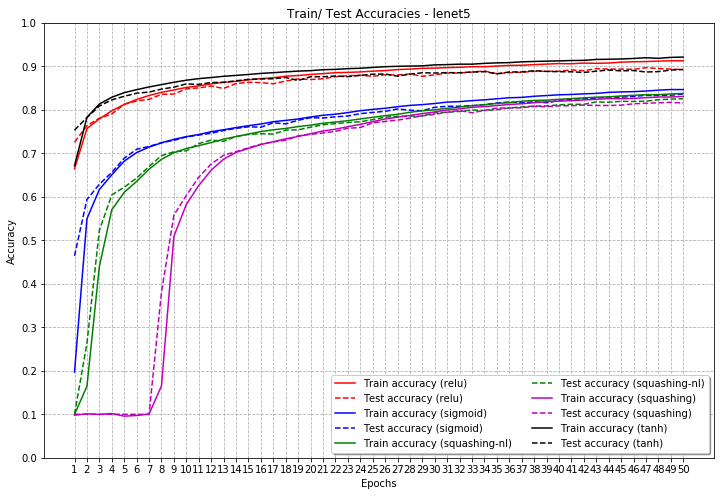

In [95]:
plt.figure(figsize=(12,8))

# Set colors for plot lines
colors_ = ['r','b','g','m','k']

# Loop over all files
for file, c in zip(fileNames, itertools.cycle(colors_)):
    
    ### Read .csv file and append to list
    model = pd.read_csv(PATH + file, index_col = 0)
    activation = file.split('_', 4)
    
    plt.plot(model['Epoch'], model['Train accuracy'],f'{c}-', label=f'Train accuracy ({activation[2]})')
    plt.plot(model['Epoch'], model['Test accuracy'],f'{c}--', label=f'Test accuracy ({activation[2]})')
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xticks(np.arange(1, 51, step=1))
    
    #position of the legend outside of the graph
    plt.legend(bbox_to_anchor=(1, 1))

### Generate the plot
plt.title(f"Train/ Test Accuracies - {fname}")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True, axis='both', linestyle='--')

plt.legend(loc='lower right', ncol=2, fancybox=True, shadow=True)
plt.show()

## Plot Epoch:Train loss and Epoch:Test loss

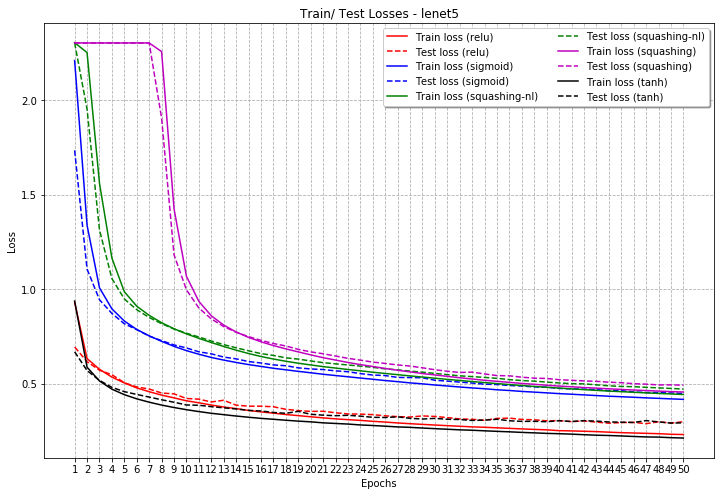

In [96]:
plt.figure(figsize=(12,8))

# Set colors for plot lines
colors_ = ['r','b','g','m','k']

# Loop over all files
for file, c in zip(fileNames, itertools.cycle(colors_)):
    
    ### Read .csv file and append to list
    model = pd.read_csv(PATH + file, index_col = 0)
    activation = file.split('_', 4)
    
    plt.plot(model['Epoch'], model['Train loss'],f'{c}-', label=f'Train loss ({activation[2]})')
    plt.plot(model['Epoch'], model['Test loss'],f'{c}--', label=f'Test loss ({activation[2]})')
    #plt.yticks(np.arange(0, 2, step=0.1))
    plt.xticks(np.arange(1, 51, step=1))


    #position of the legend outside of the graph
    plt.legend(bbox_to_anchor=(1, 1))

### Generate the plot
plt.title(f"Train/ Test Losses - {fname}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True, axis='both', linestyle='--')
plt.legend(loc='upper right', ncol=2, fancybox=True, shadow=True)

plt.show()

## Plot Epoch:Time Per Epoch

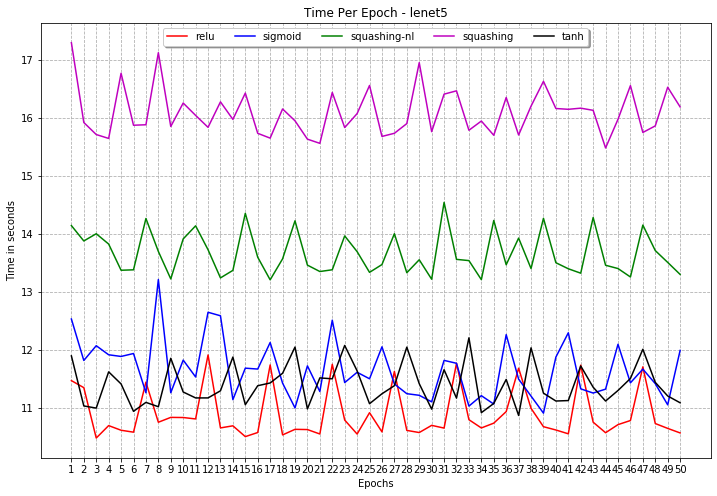

In [97]:
plt.figure(figsize=(12,8))

# Set colors for plot lines
colors_ = ['r','b','g','m','k']

# Loop over all files
for file, c in zip(fileNames, itertools.cycle(colors_)):
    
    ### Read .csv file and append to list
    model = pd.read_csv(PATH + file, index_col = 0)
    activation = file.split('_', 4)
    
    plt.plot(model['Epoch'], model['Time per epoch'],f'{c}-', label=f'{activation[2]}')
    #plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xticks(np.arange(1, 51, step=1))
    
    #position of the legend outside of the graph
    plt.legend(bbox_to_anchor=(1, 1))

### Generate the plot
plt.title(f"Time Per Epoch - {fname}")
plt.xlabel("Epochs")
plt.ylabel("Time in seconds")
plt.grid(True, axis='both', linestyle='--')
plt.legend(loc='upper center', ncol=5, fancybox=True, shadow=True)

plt.show()

## Plot Epoch:Beta

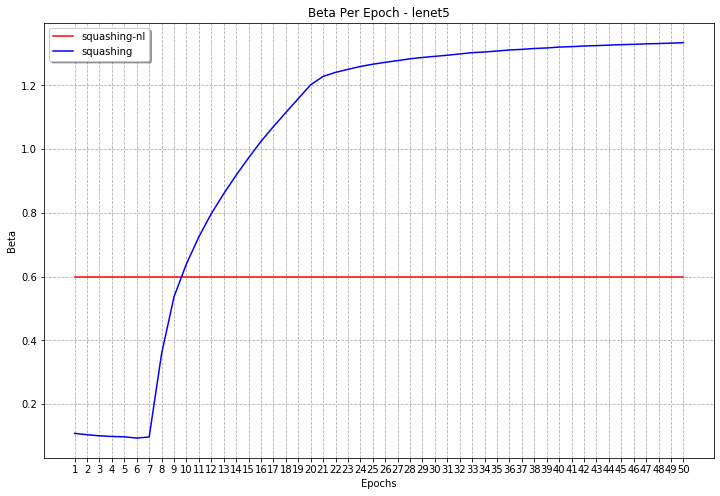

In [98]:
fileNames = [file for file in fileNames if f'_{fname}_' and ('squashing' or 'squashing-nl') in file]
plt.figure(figsize=(12,8))

# Set colors for plot lines
colors_ = ['r','b','g','m','k']

# Loop over all files
for file, c in zip(fileNames, itertools.cycle(colors_)):
    
    ### Read .csv file and append to list
    model = pd.read_csv(PATH + file, index_col = 0)
    activation = file.split('_', 4)
    
    plt.plot(model['Epoch'], model['Beta'],f'{c}-', label=f'{activation[2]}')
    #plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xticks(np.arange(1, 51, step=1))


    #position of the legend outside of the graph
    plt.legend(bbox_to_anchor=(1, 1))

### Generate the plot
plt.title(f"Beta Per Epoch - {fname}")
plt.xlabel("Epochs")
plt.ylabel("Beta")
plt.grid(True, axis='both', linestyle='--')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.show()